In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 102kB 8.7MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=53c20a9848d2435fe19757d759b68fdf259a95b918a393f8de7e55e89db00adb
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/Iris.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


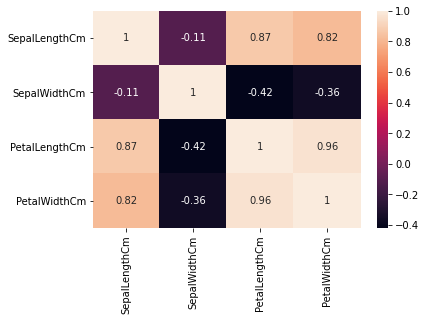

In [ ]:
sns.heatmap(data.iloc[:,1:-1].corr(),annot = True)

In [ ]:
X = data.iloc[:,0:4]
y  =data.iloc[:,5]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y= pd.get_dummies(y1).values

In [ ]:
Y

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [ ]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
y_test

In [ ]:
import keras
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU,Softmax
from keras.layers import Dropout
from kerastuner.tuners import RandomSearch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
#selecting the right parameter
def model_buliding(hp):
  model = keras.Sequential()
  for i in range(hp.Int('num_layer',1,10)):
    model.add(Dense(units=hp.Int('units_'+str(i),min_value = 1,max_value = 10,step = 2)
                        ,activation='relu'))
  model.add(Dense(3, activation="softmax"))
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])),
                       loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model


In [ ]:
tuner = RandomSearch(
    model_buliding,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    executions_per_trial=2,
    project_name='hyperparameter')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 2, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train,y_train,epochs = 100,validation_data=(X_test,y_test))

In [ ]:
tuner.results_summary()

In [ ]:
### training our model
classifier = Sequential()
classifier.add(Dense(units = 3, kernel_initializer='he_normal', activation='relu',input_dim = 4))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 9, kernel_initializer='he_normal', activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 9, kernel_initializer='he_normal', activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units =3,activation='softmax'))
classifier.compile(optimizer = keras.optimizers.Adam(learning_rate =0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_hist = classifier.fit(X_train,y_train,validation_split = 0.33,batch_size = 20,epochs = 250)
  

In [ ]:
model_history_keys = model_hist.history.keys()

In [ ]:
model_history_keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

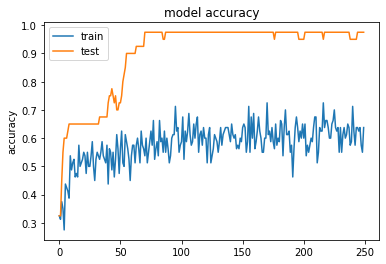

In [ ]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

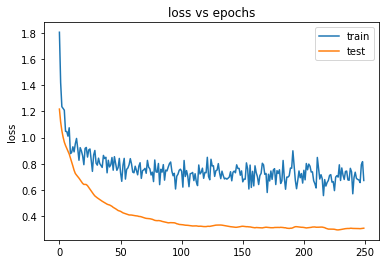

In [ ]:
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([[1.3760538e-02, 3.8361412e-02, 9.4787806e-01],
       [1.9666320e-01, 4.2651734e-01, 3.7681946e-01],
       [9.9999547e-01, 4.3158061e-06, 2.6130382e-07],
       [2.7177737e-03, 8.5140020e-03, 9.8876828e-01],
       [9.9996305e-01, 3.3849625e-05, 3.1241557e-06],
       [4.0658016e-02, 1.0430078e-01, 8.5504127e-01],
       [9.9995255e-01, 4.3307089e-05, 4.2124507e-06],
       [1.9666320e-01, 4.2651734e-01, 3.7681946e-01],
       [1.9666320e-01, 4.2651734e-01, 3.7681946e-01],
       [1.9666320e-01, 4.2651734e-01, 3.7681946e-01],
       [2.6790044e-04, 9.8794035e-04, 9.9874413e-01],
       [1.9666320e-01, 4.2651734e-01, 3.7681946e-01],
       [1.9666320e-01, 4.2651734e-01, 3.7681946e-01],
       [1.9666320e-01, 4.2651734e-01, 3.7681946e-01],
       [1.9666320e-01, 4.2651734e-01, 3.7681946e-01],
       [9.9949121e-01, 4.3972599e-04, 6.8977548e-05],
       [1.9666320e-01, 4.2651734e-01, 3.7681946e-01],
       [1.9666320e-01, 4.2651734e-01, 3.7681946e-01],
       [9.9929726e-01, 6.019

In [ ]:
y_label = np.argmax(y_test,axis=1)
y_pred_label = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

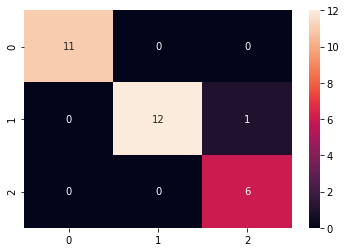

In [ ]:
cm = confusion_matrix(y_label,y_pred_label)
sns.heatmap(cm,annot = True)

In [ ]:
accuracy_score(y_pred_label,y_label)

0.9666666666666667

In [ ]:
report = classification_report(y_pred_label,y_label)

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       0.92      1.00      0.96        12\n           2       1.00      0.86      0.92         7\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.95      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'